Importing libraries

In [194]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Dataset

In [195]:
df=pd.read_csv('housing.csv')

In [196]:
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

Learning about Dataset

In [197]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [198]:
#Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [199]:
#Remove missing values
df.dropna(inplace=True)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Splitting Dataset

In [201]:
X=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [202]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [203]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [204]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [205]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13414,-117.47,34.07,24.0,1017.0,227.0,568.0,187.0,1.5972,INLAND
13085,-121.35,38.56,16.0,2629.0,491.0,1265.0,485.0,4.5066,INLAND
16682,-120.57,35.12,39.0,1656.0,333.0,866.0,317.0,2.8824,<1H OCEAN
10629,-117.78,33.71,16.0,2207.0,291.0,1081.0,308.0,7.3518,<1H OCEAN
433,-122.29,37.88,46.0,1895.0,442.0,920.0,425.0,2.9926,NEAR BAY
...,...,...,...,...,...,...,...,...,...
2142,-119.75,36.78,33.0,1145.0,197.0,508.0,198.0,2.3333,INLAND
11640,-118.06,33.83,21.0,3941.0,655.0,1897.0,670.0,4.8800,<1H OCEAN
15350,-117.30,33.26,23.0,1678.0,275.0,1227.0,264.0,4.1713,<1H OCEAN
18945,-122.03,38.28,15.0,5114.0,833.0,2418.0,778.0,4.4882,INLAND


In [206]:
train_data=X_train.join(y_train)

In [207]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13414,-117.47,34.07,24.0,1017.0,227.0,568.0,187.0,1.5972,INLAND,112500.0
13085,-121.35,38.56,16.0,2629.0,491.0,1265.0,485.0,4.5066,INLAND,140200.0
16682,-120.57,35.12,39.0,1656.0,333.0,866.0,317.0,2.8824,<1H OCEAN,195200.0
10629,-117.78,33.71,16.0,2207.0,291.0,1081.0,308.0,7.3518,<1H OCEAN,331200.0
433,-122.29,37.88,46.0,1895.0,442.0,920.0,425.0,2.9926,NEAR BAY,192100.0
...,...,...,...,...,...,...,...,...,...,...
2142,-119.75,36.78,33.0,1145.0,197.0,508.0,198.0,2.3333,INLAND,81300.0
11640,-118.06,33.83,21.0,3941.0,655.0,1897.0,670.0,4.8800,<1H OCEAN,343900.0
15350,-117.30,33.26,23.0,1678.0,275.0,1227.0,264.0,4.1713,<1H OCEAN,133800.0
18945,-122.03,38.28,15.0,5114.0,833.0,2418.0,778.0,4.4882,INLAND,144000.0


Visualizing Data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

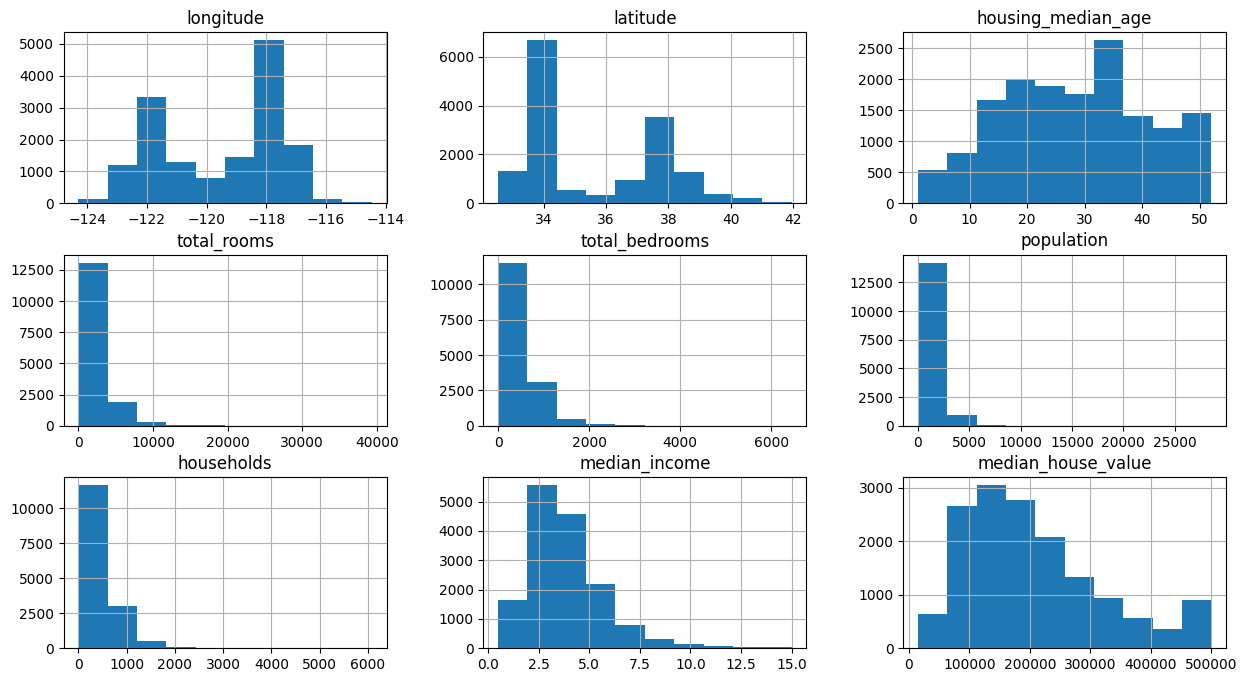

In [208]:
train_data.hist(figsize=(15,8))

<Axes: >

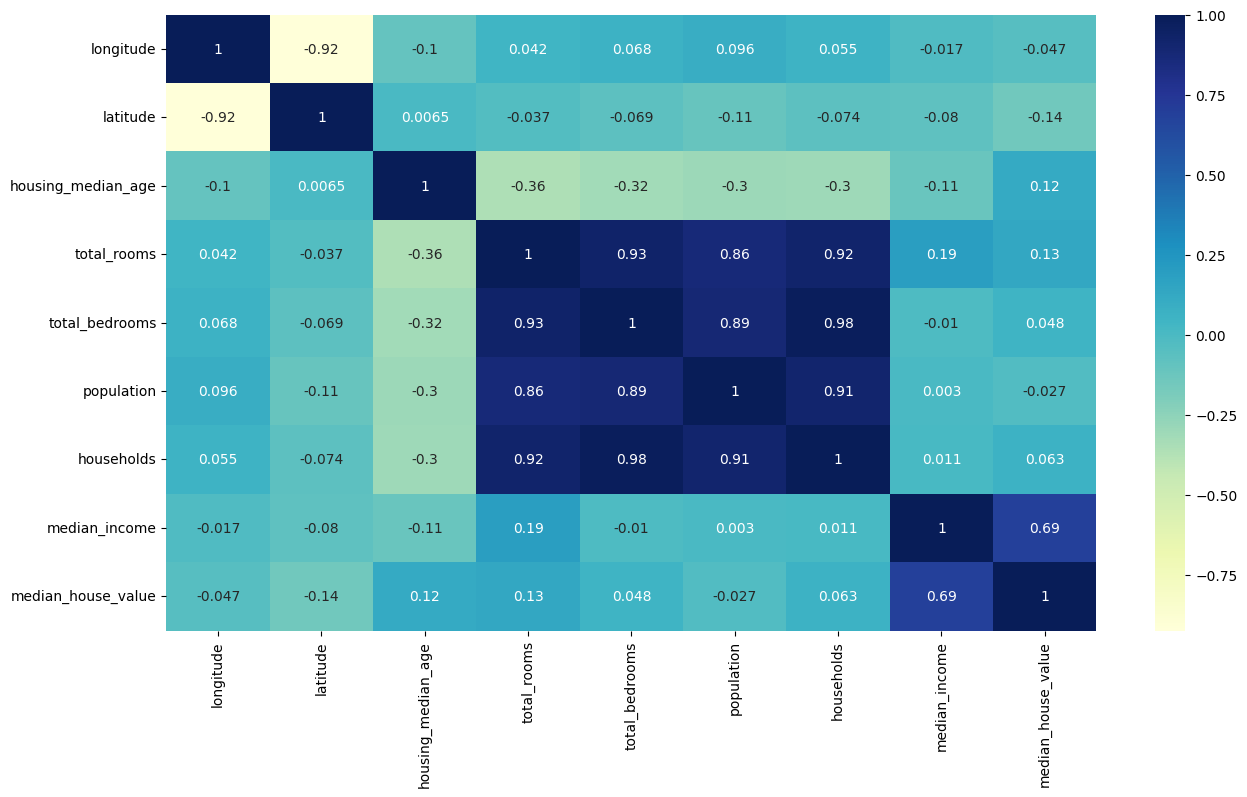

In [209]:
plt.figure(figsize=(15,8))
sns.heatmap( train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

Making a more Gaussian curve

In [210]:
#Previous histogram is very right skewed
train_data['total_rooms']= np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms']+1)
train_data['population']= np.log(train_data['population']+1)
train_data['households']= np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

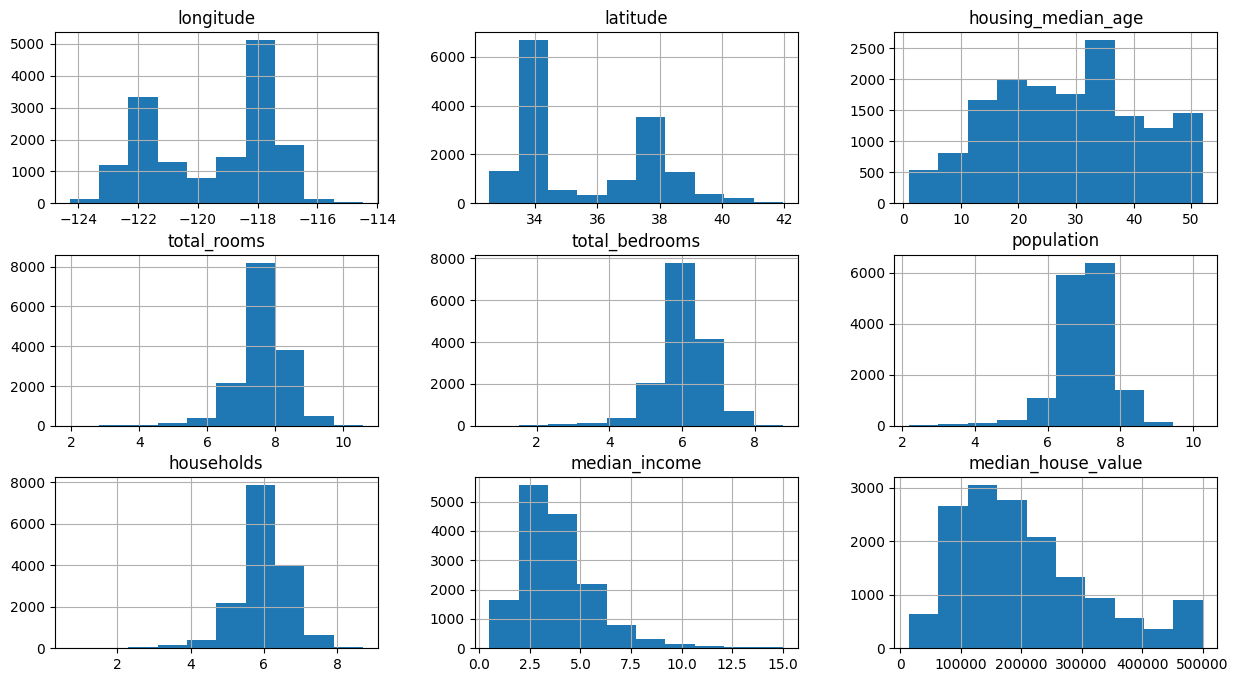

In [211]:
train_data.hist(figsize=(15,8))

One hot Encoding

In [212]:
#one hot encoding type
#separating all different ocean values as columns
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

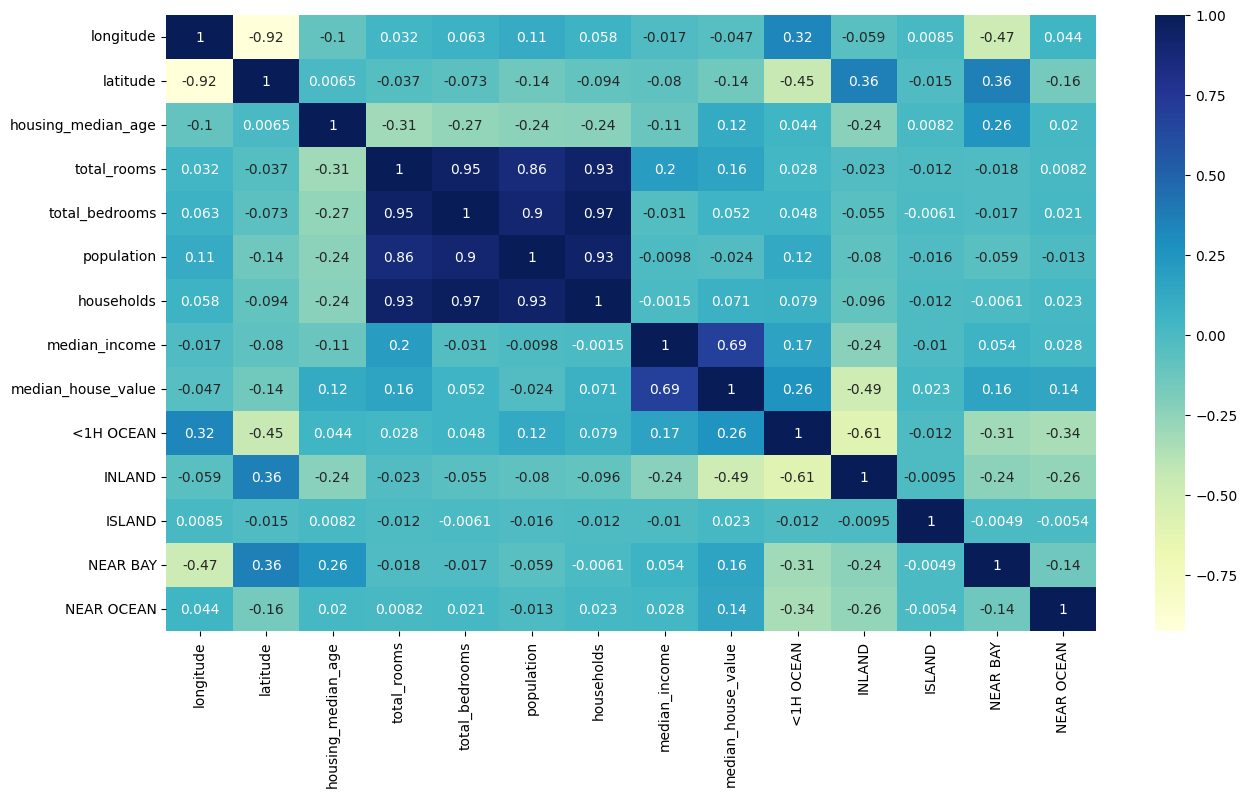

In [213]:
plt.figure(figsize=(15,8))
sns.heatmap( train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

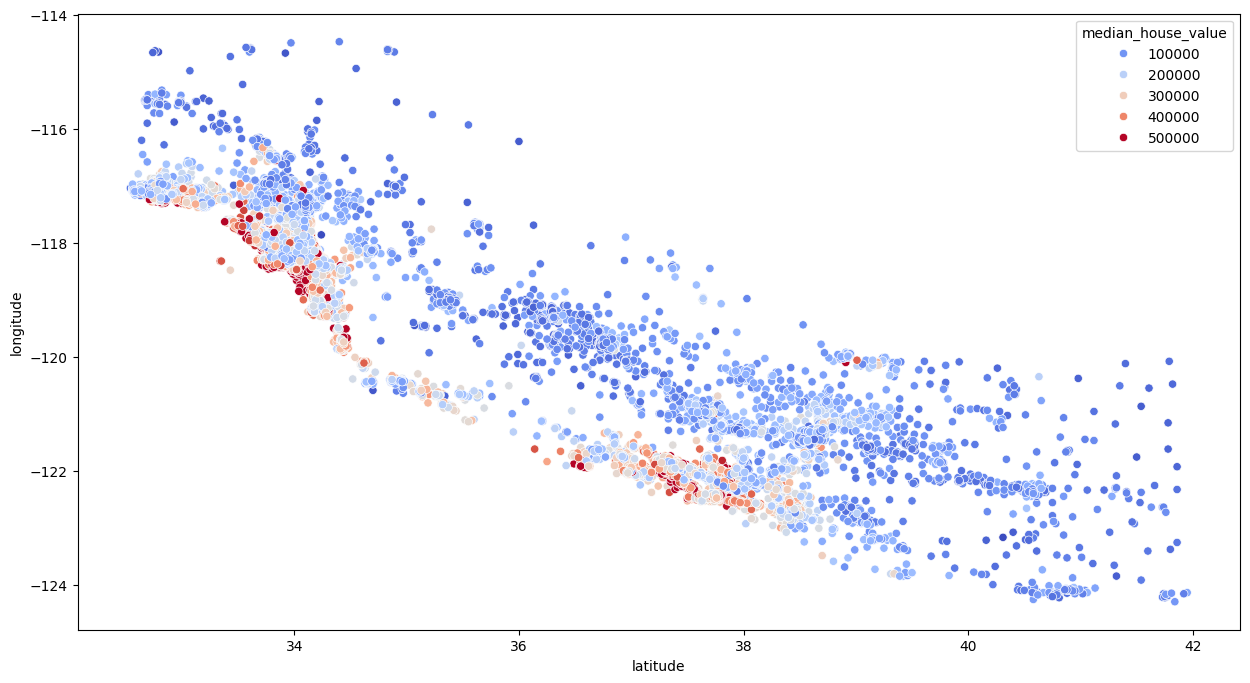

In [214]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

New features of Dataset

In [215]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']


<Axes: >

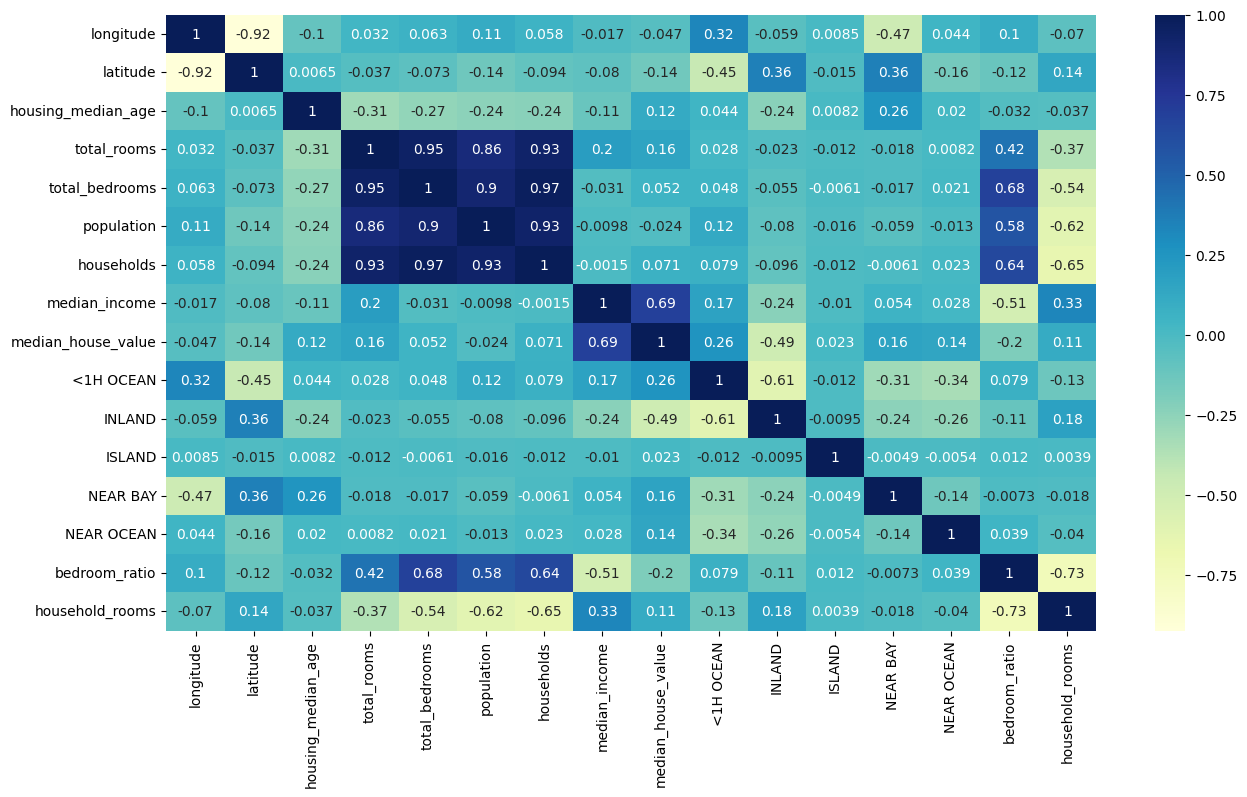

In [216]:
plt.figure(figsize=(15,8))
sns.heatmap( train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

Linear Regression

In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#standardizing and normalizing
scaler=StandardScaler()

X_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_train_s=scaler.fit_transform(X_train)
reg=LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [218]:
#applying same things to test data
test_data=X_test.join(y_test)

test_data['total_rooms']= np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']= np.log(test_data['total_bedrooms']+1)
test_data['population']= np.log(test_data['population']+1)
test_data['households']= np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']




In [219]:
X_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [220]:
X_test_s=scaler.transform(X_test)

In [221]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
13140,-121.41,38.34,24.0,7.381502,5.627621,7.584265,5.525453,3.0833,162500.0,False,True,False,False,False,0.762395,1.335909
13236,-117.65,34.14,16.0,7.694848,5.662960,6.856462,5.669881,8.6573,354000.0,False,True,False,False,False,0.735942,1.357145
4639,-118.30,34.06,47.0,7.237778,6.771936,7.958926,6.719013,1.4680,137500.0,True,False,False,False,False,0.935637,1.077209
2902,-119.02,35.38,48.0,5.849325,4.532599,4.867534,4.158883,1.1875,63800.0,False,True,False,False,False,0.774893,1.406465
10189,-117.96,33.87,37.0,7.487734,5.888878,7.052721,6.001415,4.7984,175800.0,True,False,False,False,False,0.786470,1.247661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,-118.19,34.12,44.0,7.106606,5.783825,6.944087,5.645447,4.0417,170600.0,True,False,False,False,False,0.813866,1.258821
6017,-117.78,34.05,39.0,7.984122,6.381816,7.542744,6.311735,3.9224,131300.0,False,True,False,False,False,0.799313,1.264965
2908,-119.04,35.37,44.0,7.389564,5.739793,6.504288,5.707110,2.8750,82700.0,False,True,False,False,False,0.776743,1.294800
15562,-116.97,33.13,10.0,8.546752,6.747587,7.686162,6.664409,6.7957,287500.0,True,False,False,False,False,0.789491,1.282447


In [222]:
reg.score(X_test_s,y_test)

0.679392507932271

Random Forest 

In [223]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [224]:
forest.score(X_test_s,y_test)

0.8240175665401028

Hyper Parameter Tuning

In [225]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()

#can change this values as required, used to find best parameters
param_grid={
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}

grid_search=GridSearchCV(forest,param_grid,cv=5,
scoring="neg_mean_squared_error",
return_train_score=True)

grid_search.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [226]:
best_forest=grid_search.best_estimator_

In [227]:
best_forest.score(X_test_s,y_test)

0.8201823177823372